In [29]:
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['figure.dpi'] = 150

## 1. Taylor expansion

You can expand any continuous function as a polynomials

$ f(x)=\sum_{n=0}^\infty \frac{1}{n!}f^{(n)}(x_0)\,(x-x_0)^n$

Here, $( f^{(n)} $) is the nth derivative and $( x_0 $) is the argument around which we expand the function

### 1.1 Example: Exponential function

$ f(x)=f'(x)=f''(x)=\dots=f^{(n)}(x)=\exp(x)$

In [3]:
def exp_Taylor(x,x0,nmax):
    # x: arguement of the function
    # x0: the arguement of the derivatives to be calculated
    # the number of the maximum term 
    t = 0 
    for n in range(nmax): 
        t = t + np.exp(x0)*(x-x0)**n / np.math.factorial(n)
        
    return t

In [4]:
data= [np.abs(exp_Taylor(1,0,i) - np.e) for i in range(25)]

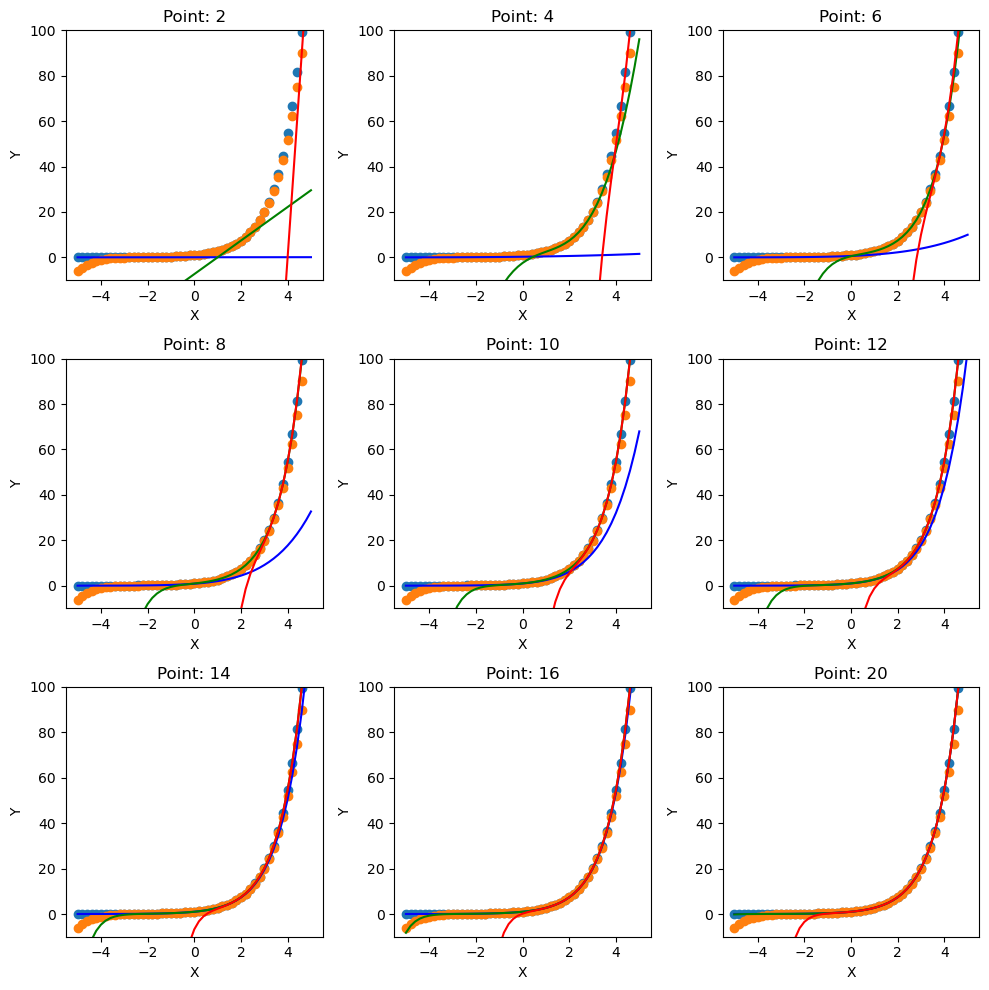

In [5]:
points = [2,4,6,8,10,12,14,16,20]


fig, axes = plt.subplots(3, 3, figsize=(10, 10), dpi=100)

axes = axes.flatten()
x_values = np.linspace(-5,5,51)

for i, point in enumerate(points):

    plt.sca(axes[i])
    
    plt.scatter(x_values,np.exp(x_values))
    plt.scatter(x_values,exp_Taylor(x_values[:],0,8))


    plt.plot(x_values,exp_Taylor(x_values[:],-5,point),'blue')
    plt.plot(x_values,exp_Taylor(x_values[:],2,point),'green')
    plt.plot(x_values,exp_Taylor(x_values[:],5,point),'red')
    plt.ylim([-10,100])

    plt.xlabel('X')
    plt.ylabel('Y')


    # Set title and labels for the current subplot
    plt.title(f'Point: {point}')

# Remove extra subplots that are not used
for i in range(len(points), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### 1.2 Example: sin function at $(x_0 = 0$)

$( f(0) = f''(0) = f^{(4)}(0) = \dots = 0 $)

$( f'(0) = f^{(5)}(0) = f^{(9)}(0) = \dots = 1 $)

$( f'''(0) = f^{(7)}(0) = f^{(11)}(0) = \dots = -1 $)

$( \sin(x) = x - \frac{1}{3!}x^3 + \frac{1}{5!}x^5  - \frac{1}{7!}x^7 \pm \dots = \sum_{n=0}^\infty \frac{(-1)^n}{(2n+1)!}x^{2n+1}$)

In [6]:
def sin_Taylor(x,nmax):
    # x: arguement of the function
    # the number of the maximum term 
    t = 0 
    for n in range(nmax): 
        t = t + ((-1)**n*x**(2*n+1)) / np.math.factorial(2*n+1)
        
    return t

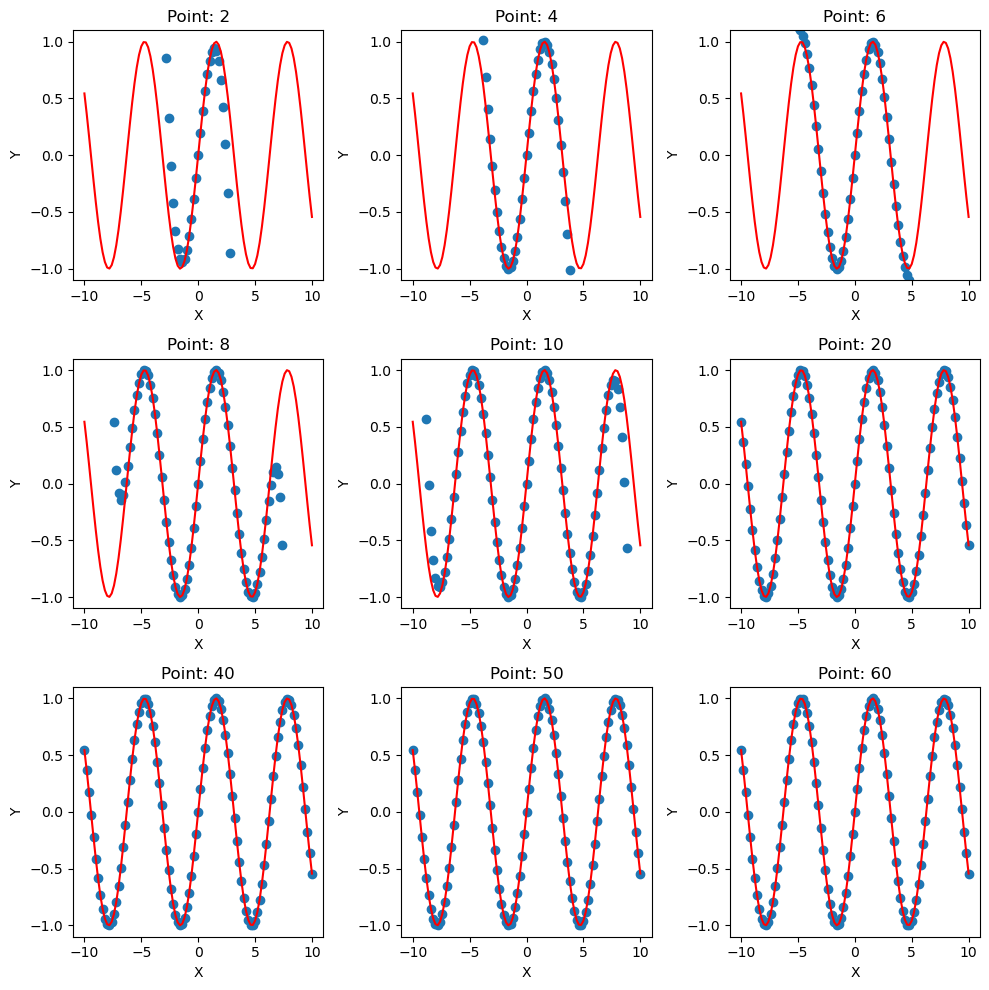

In [7]:
points = [2,4,6,8,10,20,40,50,60]


fig, axes = plt.subplots(3, 3, figsize=(10, 10), dpi=100)

axes = axes.flatten()
x_values = np.linspace(-10,10,101)

for i, point in enumerate(points):

    plt.sca(axes[i])
    
    plt.scatter(x_values,sin_Taylor(x_values[:],point))
    plt.plot(x_values,np.sin(x_values),'red')

    plt.xlabel('X')
    plt.ylabel('Y')

    plt.ylim([-1.1,1.1])
    # Set title and labels for the current subplot
    plt.title(f'Point: {point}')

# Remove extra subplots that are not used
for i in range(len(points), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### 1.3 Implementation of a general function

Derivative (more details in separate section): $( f'(x) = \lim_{h\rightarrow 0} \frac{f(x+h)-f(x)}{h} $)
We will check then the tangent lines as defined from $y = f(\alpha) + f'(\alpha)(x - \alpha)$ for the functions $f(x) = 2*sin^{2}(x) + x$ and the $f(x) = 2*sin^{2}(x)*e^{x} + x$

In [8]:
def derivative(f,x,h):
    """
    f : function 
    x : value
    h : stepsize 
    """
    return (f(x+h) -f(x))/h

# Test function
def func(x):
    return 2*np.sin(x)**2 + x 

def func2(x):
    return 2*np.sin(x)**2*np.exp(x) + x 

# Equation of tangent line 

def tanline(f,g,a,x):
    """
    f : function 
    g : derivative of function
    x : values
    a : point for the tangent line 
    """
    
    return f(a) + g*(x-a)

Higher derivatives: $( f^{(n)}(x) = \lim_{h\rightarrow 0} \frac{1}{h^n}\sum_{k=0}^n(-1)^{k+n} \,\frac{n!}{k!(n-k)!} \,f(x+kh)$)

In [9]:
def n_derivative(f,x,h,n):
    
    """
    f : function 
    x : value
    h : stepsize 
    n : order
    """
    t = 0 
    
    for k in range(n+1):
        t = t + (-1)**(k+n) * (np.math.factorial(n)/(np.math.factorial(k)*np.math.factorial(n-k)))*f(x + k*h)
    
    return t/h**n

In [10]:
print(derivative(func,10,0.0001))

print(n_derivative(func,10,0.0001,1))

2.825972105693353
2.825972105693353


In [11]:
tanline(func,derivative(f= func,x=1,h=0.001),10,1)

-14.767934192546832

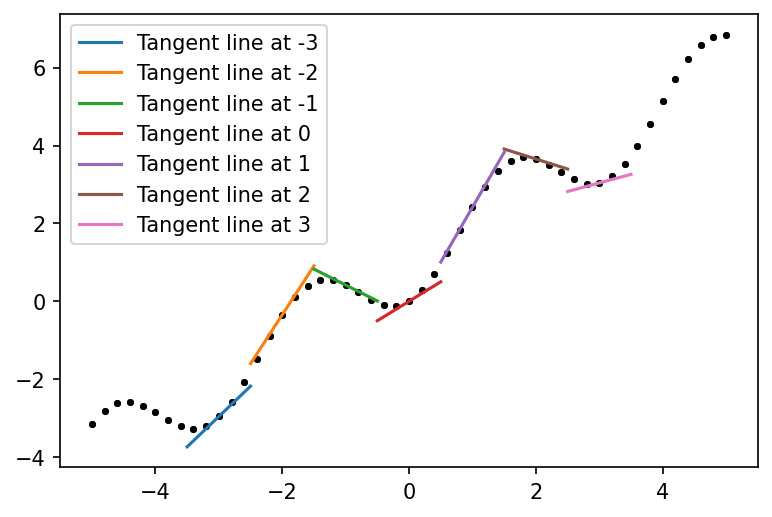

In [12]:
alphas = [-3,-2,-1,0,1,2,3]

plt.figure(dpi=150)

for alpha in alphas:
    x= np.linspace(-5,5,51)
    y = np.linspace(alpha-0.5,alpha+0.5,51)

    d = derivative(f= func,x=alpha,h=0.00001)

    plt.scatter(x,func(x[:]),alpha=0.5,color='black',s=5)

    plt.plot(y,tanline(func,d,alpha,y),label=f'Tangent line at {alpha}')
    
plt.legend()

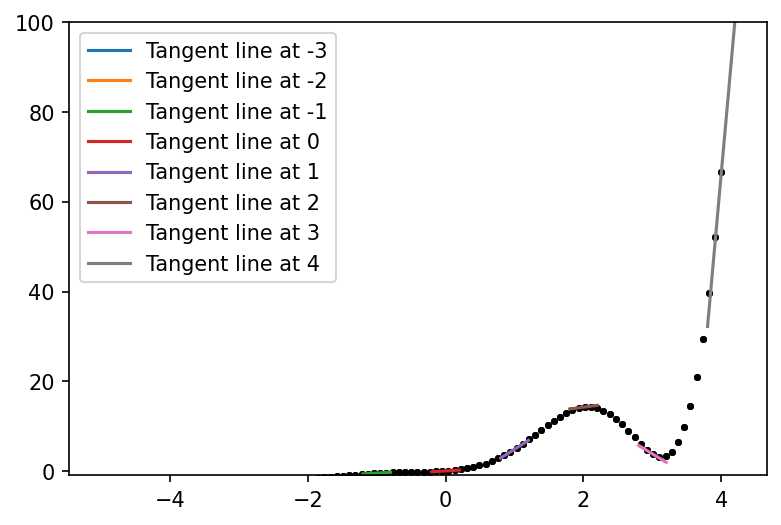

In [13]:
alphas = [-3,-2,-1,0,1,2,3,4]

plt.figure(dpi=150)

for alpha in alphas:
    x= np.linspace(-5,4,101)
    y = np.linspace(alpha-0.2,alpha+0.2,101)

    d = derivative(f= func2,x=alpha,h=0.00001)

    plt.scatter(x,func2(x[:]),alpha=0.5,color='black',s=5)

    plt.plot(y,tanline(func2,d,alpha,y),label=f'Tangent line at {alpha}')

plt.ylim([-1,100])
plt.legend()

## Define the Taylor expansion

###  $f(x) = \sum^{\infty}_{n =0} \frac{f^{(n)}(\alpha)}{n!} (x- \alpha)^{n}$

In [14]:
def taylor(f,x,a,nmax,h):
    """
    f : function n derivative
    x : value of the value
    a : point arount the expansion
    nmax : maximum order of expantion
    h : stepsize
    """
    
    t = 0 
    
    for n in range(nmax+1):
        t = t + n_derivative(f,a,h,n)*(x-a)**n / np.math.factorial(n)
        
    return t 

(-4.0, 8.0)

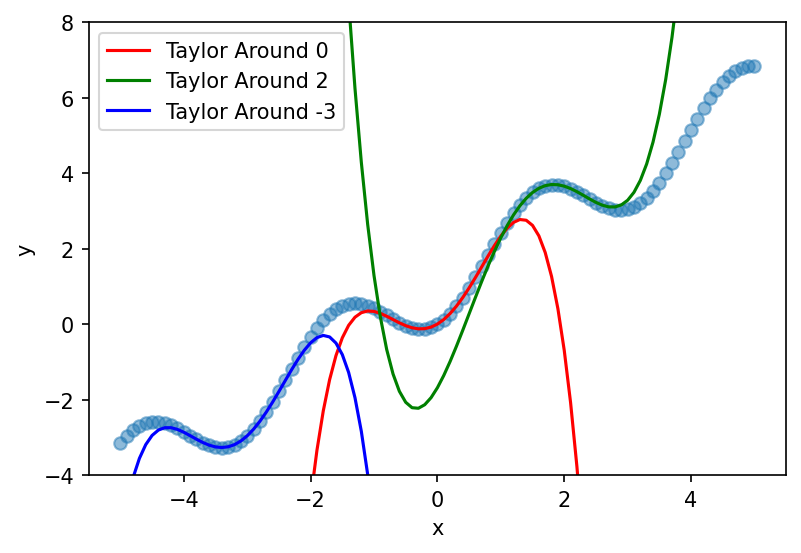

In [15]:
plt.figure(dpi=150)
plt.xlabel('x')
plt.ylabel('y')

x_list = np.linspace(-5,5,101)

plt.scatter(x_list,func(x_list[:]),alpha=0.5)

nmax = 4
h = 0.001

plt.plot(x_list,taylor(func,x_list,0,nmax,h),color='red',label = f'Taylor Around {0}')
plt.plot(x_list,taylor(func,x_list,2,nmax,h),color='green',label = f'Taylor Around {2}')
plt.plot(x_list,taylor(func,x_list,-3,nmax,h),color='blue',label = f'Taylor Around {-3}')

plt.legend()
plt.ylim([-4,8])

(0.0, 8.0)

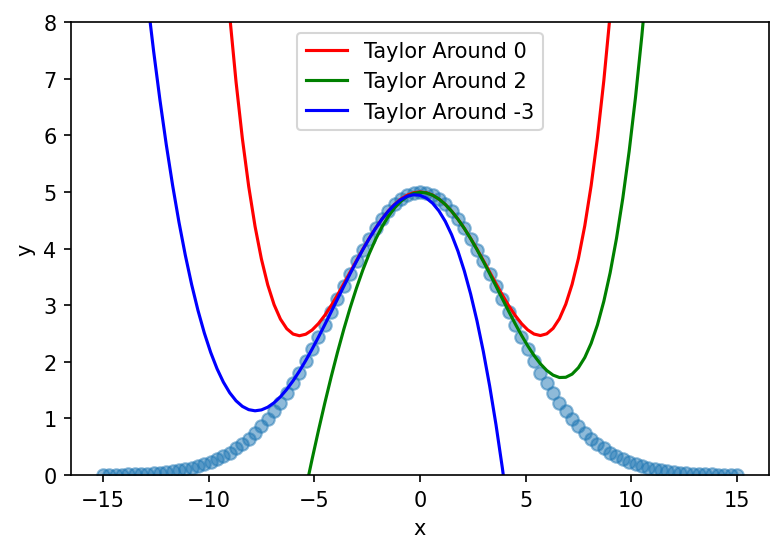

In [24]:
def gaussian(x,height=5,center=0,c=4):
    return height*np.exp(-(x-center)**2/(2*c**2))



plt.figure(dpi=150)
plt.xlabel('x')
plt.ylabel('y')

x_list = np.linspace(-15,15,101)

plt.scatter(x_list,gaussian(x_list[:]),alpha=0.5)

nmax = 4
h = 0.001

plt.plot(x_list,taylor(gaussian,x_list,0,nmax,h),color='red',label = f'Taylor Around {0}')
plt.plot(x_list,taylor(gaussian,x_list,2,nmax,h),color='green',label = f'Taylor Around {2}')
plt.plot(x_list,taylor(gaussian,x_list,-3,nmax,h),color='blue',label = f'Taylor Around {-3}')

plt.legend()
plt.ylim([0,8])

## 2. Interpolation

### 2.1 Generate data points

In [44]:
def correctFunction(x): 
    
    return 15 + 2.4*x + 0.5*x**2 - 0.35 *x**3

In [45]:
npoints = 21 

x_list = np.linspace(-5,5,npoints)
data0 = np.array([x_list,correctFunction(x_list)])

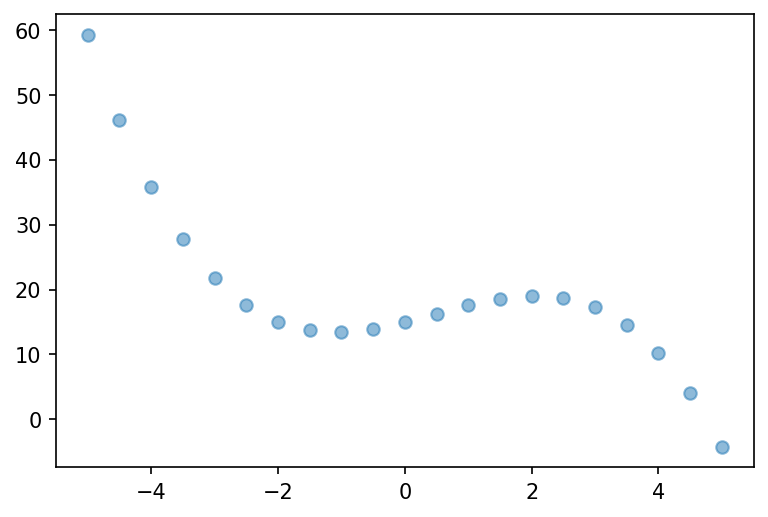

In [46]:
plt.scatter(data0[0],data0[1],alpha=0.5)

Modify x and y values by adding random numbers

In [67]:
# we want the range to be from -0.1 to 0.1

random_distortions = 3*(2*np.random.rand(npoints) - 1)

In [68]:
data = np.array([data0[0],data0[1]+random_distortions])

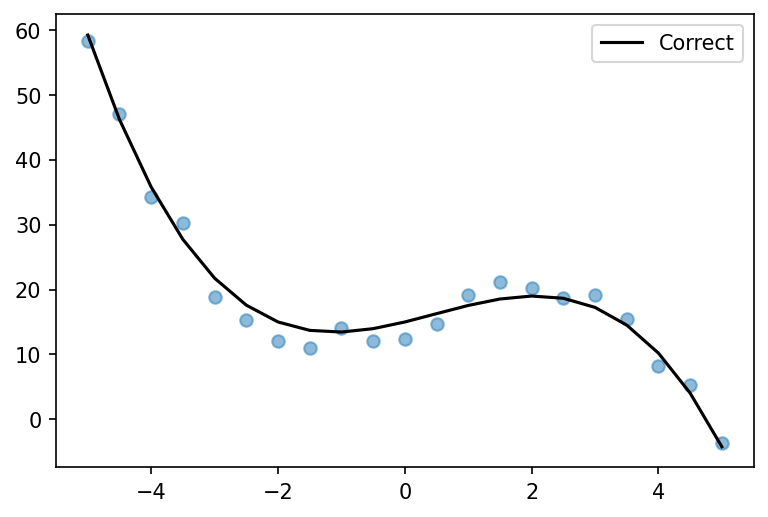

In [75]:
plt.scatter(data[0],data[1],alpha=0.5)
plt.plot(data0[0],data0[1],label='Correct',color='black')

plt.legend()

## 2.2 Spline interpolation

A spline interpolation always fits the data perfectly and even has a continuous derivative, if a cubic spline is used.

The spline is defined piecewise.

### 2.2.1 Unperturbed data

In [77]:
from scipy import interpolate

- linear splines

In [84]:
splineLinear0 = interpolate.interp1d(data0[0],data0[1],kind ='linear')

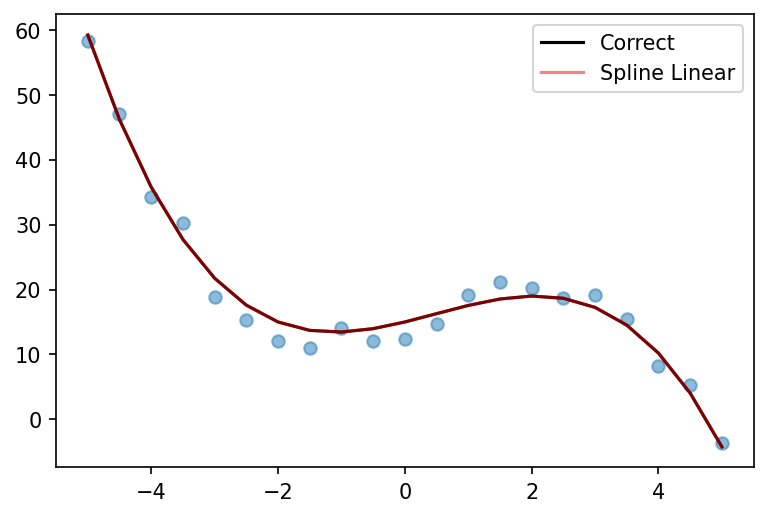

In [85]:
plt.scatter(data[0],data[1],alpha=0.5)
plt.plot(data0[0],data0[1],label='Correct',color='black')
plt.plot(data[0],splineLinear0(data0[0]),alpha=0.5,label='Spline Linear',color='red')

plt.legend()

- zoom

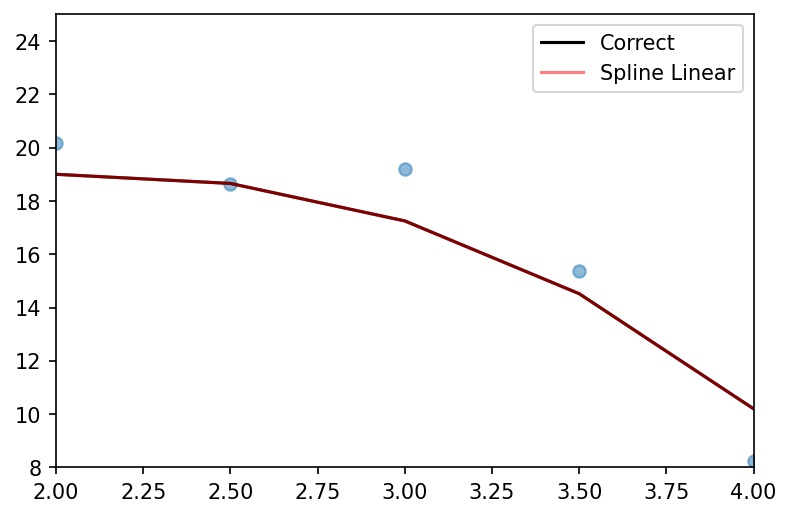

In [87]:
plt.scatter(data[0],data[1],alpha=0.5)
plt.plot(data0[0],data0[1],label='Correct',color='black')
plt.plot(data[0],splineLinear0(data0[0]),alpha=0.5,label='Spline Linear',color='red')

plt.xlim([2,4])
plt.ylim([8,25])
plt.legend()

- cubic spline

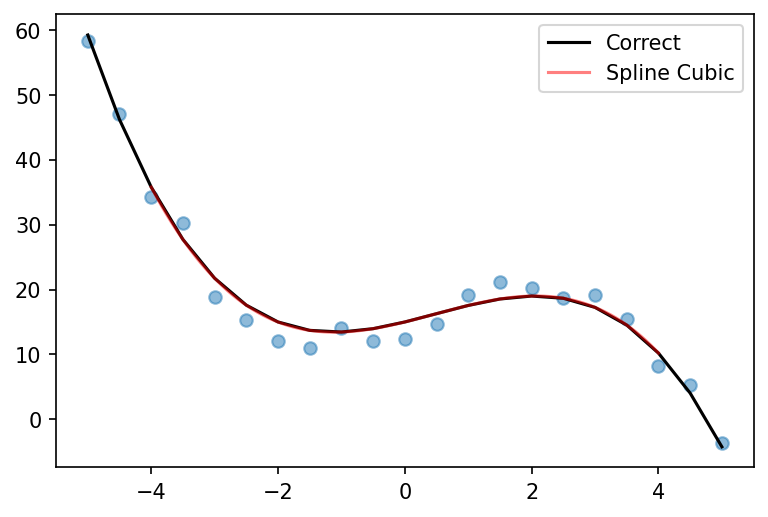

In [97]:
splineCubic = interpolate.interp1d(data0[0],data0[1],kind ='cubic')
x_list = np.linspace(-4,4,201)

plt.scatter(data[0],data[1],alpha=0.5)
plt.plot(data0[0],data0[1],label='Correct',color='black')
plt.plot(x_list,splineCubic(x_list),alpha=0.5,label='Spline Cubic',color='red')

plt.legend()

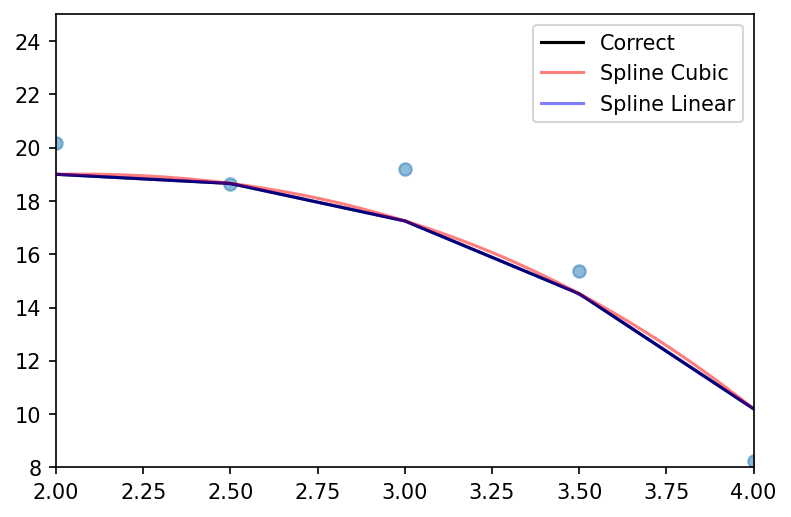

In [98]:
plt.scatter(data[0],data[1],alpha=0.5)
plt.plot(data0[0],data0[1],label='Correct',color='black')
plt.plot(x_list,splineCubic(x_list),alpha=0.5,label='Spline Cubic',color='red')
plt.plot(x_list,splineLinear0(x_list),alpha=0.5,label='Spline Linear',color='blue')
plt.xlim([2,4])
plt.ylim([8,25])
plt.legend()

### 2.2.2 Perturbed data

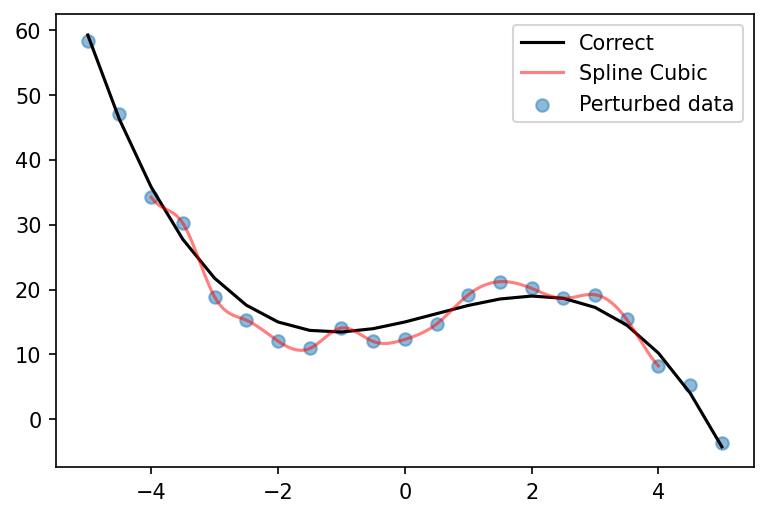

In [103]:
splineCubic1 = interpolate.interp1d(data[0],data[1],kind ='cubic')


plt.scatter(data[0],data[1],alpha=0.5,label='Perturbed data')
plt.plot(data0[0],data0[1],label='Correct',color='black')
plt.plot(x_list,splineCubic1(x_list),alpha=0.5,label='Spline Cubic',color='red')

plt.legend()

- How to handle data which is not smooth?

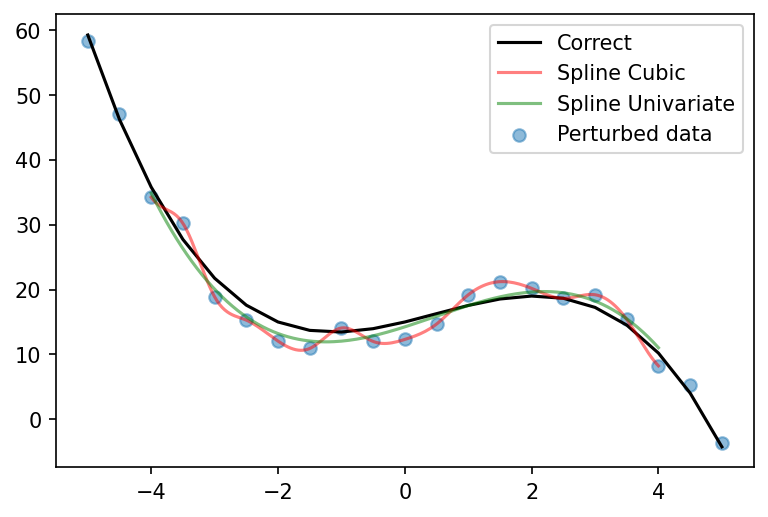

In [107]:
splineUnivariate1 = interpolate.UnivariateSpline(data[0],data[1])
splineUnivariate1.set_smoothing_factor(500)

plt.scatter(data[0],data[1],alpha=0.5,label='Perturbed data')
plt.plot(data0[0],data0[1],label='Correct',color='black')
plt.plot(x_list,splineCubic1(x_list),alpha=0.5,label='Spline Cubic',color='red')
plt.plot(x_list,splineUnivariate1(x_list),alpha=0.5,label='Spline Univariate',color='green')

plt.legend()

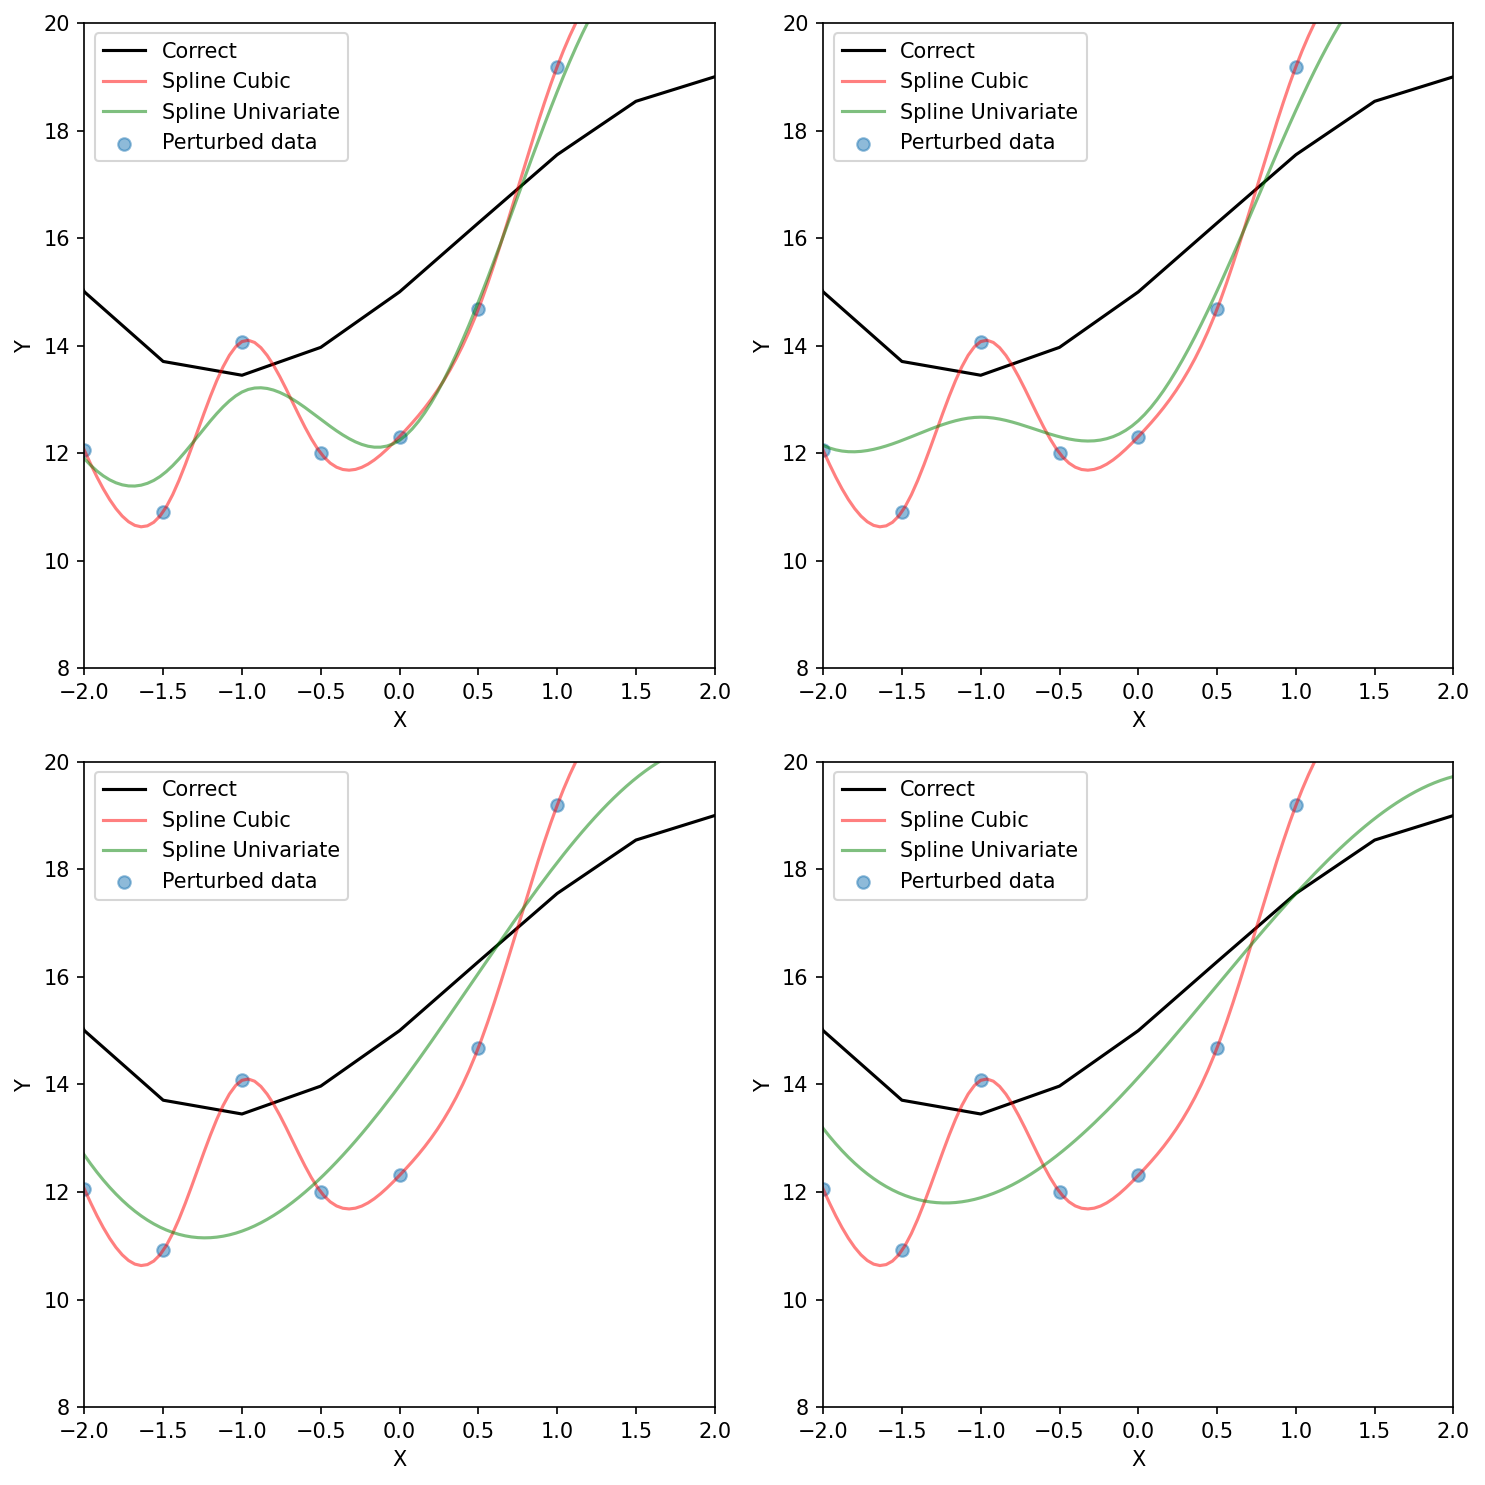

In [115]:
sf = [10,20,40,50]


fig, axes = plt.subplots(2, 2, figsize=(10, 10), dpi=150)

axes = axes.flatten()


for i, sf in enumerate(sf):

    plt.sca(axes[i])
    
    splineUnivariate1 = interpolate.UnivariateSpline(data[0],data[1])    
    splineUnivariate1.set_smoothing_factor(sf)

    plt.scatter(data[0],data[1],alpha=0.5,label='Perturbed data')
    plt.plot(data0[0],data0[1],label='Correct',color='black')
    plt.plot(x_list,splineCubic1(x_list),alpha=0.5,label='Spline Cubic',color='red')
    plt.plot(x_list,splineUnivariate1(x_list),alpha=0.5,label='Spline Univariate',color='green')

    plt.xlim([-2,2])
    plt.ylim([8,20])
    
    plt.xlabel('X')
    plt.ylabel('Y')
    
    
    plt.legend()
    
# Remove extra subplots that are not used
for i in range(len(points), len(axes)):
    fig.delaxes(axes[i])



# Adjust layout and display the plots
plt.tight_layout()
plt.show()

## 2.3 Fitting a model function

Choose ideal parameters of a (physically motivated) model function such that error is minimized.

### 2.3.1 Define model function

For practice, we consider a polynomial: \\( f(x) = a_0 + a_1 x + a_2 x^2 + \dots + a_n x^n = \sum_{k=0}^n a_k x^k\\)

### 2.3.2 Define error 

There are many reasonable definitions of an error function but a very common choice is: \\( \Delta = \sum_{i=1}^n \left(y_i-f(x_i)\right)^2\\)

\\( f \\) is the fit function that is determined by the coefficients \\( a_i \\) in our case.

\\( (x_i, y_i) \\) are the data points that we try to fit.

### 2.3.3 Update coefficients to reduce the error (gradient descent)

We can use several different methods to minimize the error, e. g. a Monte-Carlo algorithm. Here, we will use the gradient descent method. The coefficients \\( a_i \\) will be updated along the gradient direction of the error function \\( \nabla_{\vec{a}} \Delta\\). The gradient consists of elements \\( \frac{\partial}{\partial a_k} \Delta = -2 \sum_{i=1}^n \left(y_i-f(x_i)\right) \frac{\partial}{\partial a_k}f(x_i) = -2 \sum_{i=1}^n \left(y_i-f(x_i)\right) x_i^{k}\\)

### 2.3.4 Loop for the actual fitting

- Comparison of a and a0